## Birthday problem simulation (Classic version) ##


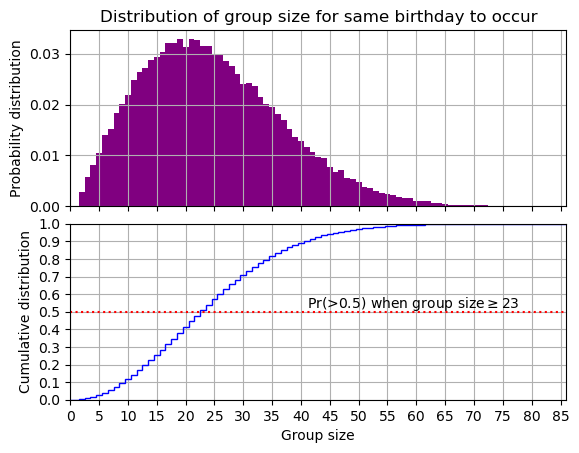

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sims = int(1e5)
grpsize = []
rng = np.random.default_rng()

for i in range(sims):
    BD = []
    sameBD = 0
    while sameBD==0:
        newBD = rng.integers(1, 366)
        BD.append(newBD)
        uniq = set(BD)
        sameBD = len(BD)-len(uniq)
    grpsize.append(len(BD))

Max = max(grpsize)+1

fig,(ax1, ax2) = plt.subplots(2,1)
bins = np.arange(0, Max)-0.5
prob, a1, a2 = ax1.hist(grpsize, bins, 
               density=True, color='purple')
ax1.set_ylabel('Probability distribution')
ax1.set_title('Distribution of group size for'
              ' same birthday to occur')

plt.subplots_adjust(hspace=0.1)
plt.setp(ax1.get_xticklabels(), visible=False)

cprob, b1, b2 = ax2.hist(grpsize, bins, 
                density=True, cumulative=True,
                histtype='step', color = 'b')
ax2.set_ylabel('Cumulative distribution')
ax2.set_yticks(np.arange(0,1.01,0.1))
ax2.set_ylim([0,1])
ax2.set_xlabel('Group size')

P=0.5
ax2.axhline(y=P, color='r', linestyle=':')
ans = np.searchsorted(cprob, P)
ax2.text(41, 0.52, f'Pr(>{P}) when group size'
                   r'$\geq$' f'{ans}')
people = np.arange(1,101)

for X in [ax1,ax2]:
    X.set_xticks(range(0,Max,5))
    X.set_xlim(0,Max-2)
    X.grid('on')

plt.show()

## Extension : Multiple shared birthdays ##

Let $P(n,k)$ be the probability that amongst $n$ people there are at least $k$ unique shared birthdays. 

For a given $k$, we wish to find the smallest $n$ such that $P(n,k)>0.5$. 

The original birthday problem corresponds to the case $k=1$.

E.g. when $k=2$, the answer is $n=36$ 

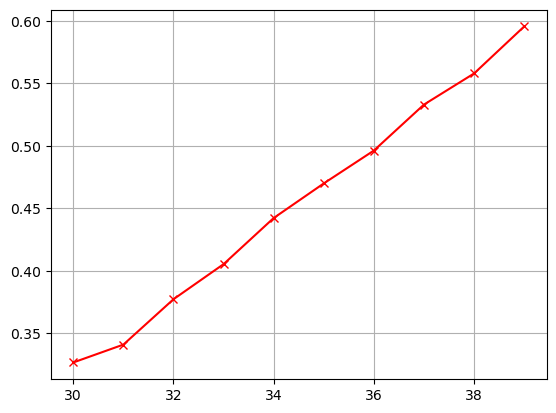

In [3]:
# Multiple shared birthdays: 
# Requires a guess (interval containing the answer)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# how many multiple birthdays to investigate?
k = 2

# Guess the interval for which the prob exceeds 0.5
Grpsize = np.arange(30,40)

# No. of simulations
sims = int(1e4)


rng = np.random.default_rng()
bins = np.arange(1,366)
pshared = []

for grpsize in Grpsize:
    multi =[]    
    for i in range(sims):
        # everyone's birthday
        BD = rng.integers(1,366, size=grpsize)
        # tally of birthdays
        count, bd= np.histogram(BD, bins = bins)
        # count how many birthdays belong to more than 1 person
        multi.append(sum(c >1 for c in count))
    # How many times does "multi" exceed k?
    prob = sum(m>=k for m in multi)/len(multi)
    pshared.append(prob)


plt.plot(Grpsize, pshared, 'r-x')
plt.grid('on')
plt.show()


## Extension : More than 2 people sharing a birthday ##

Let $P(n,k)$ be the probability that at least $k$ people in a group of $n$ people share the same birthday. 

For a given $k$, we wish to find the smallest $n$ such that $P(n,k)>0.5$. 

The original birthday problem corresponds to the case $k=2$.

E.g. when $k=3$, the answer is $n=88$.


In [ ]:
# At least k birthday sharers. Requires a guess

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# At least how many people to share a birthday?
k = 3

# Guess the interval for which the prob exceeds 0.5
Grpsize = np.arange(85,90)

# No. of simulations
sims = int(1e4)


rng = np.random.default_rng()
bins = np.arange(1,366)
pshared = []

for grpsize in Grpsize:
    multi =[]    
    for i in range(sims):
        # everyone's birthday
        BD = rng.integers(1,366, size=grpsize)
        # tally of birthdays
        count, bd= np.histogram(BD, bins = bins)
        # count how many birthdays belong to more than k person
        multi.append(sum(c >=k for c in count))
    # How many realisations had nonzero k-birthday sharers?
    prob = sum(m>0 for m in multi)/len(multi)
    pshared.append(prob)


plt.plot(Grpsize, pshared, 'r-x')
plt.grid('on')
plt.show()